# Interactive Widgets in IJulia

IPython 2.0 introduced interactive widgets, which are basically:

* Javascript widgets (sliders, buttons, etcetera)
* A communications protocol for the widgets to talk to the kernel
* A Python interface to create and manipulate these.

Thanks to fantastic work by a Google Summer of Code student, [Shashi Gowda](https://github.com/shashi/), the same features are accessible from a Julia interface.

In [2]:
using Interact

INFO: Precompiling module Reactive...


  likely near /home/mahi/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/mahi/.julia/v0.4/Interact/src/IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/mahi/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/mahi/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/mahi/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


In [3]:
@manipulate for n in 1:10
    rand(n,n)
end

Interact.Slider{Int64}([Reactive.Input{Int64}] 5,"n",5,1:10)

5x5 Array{Float64,2}:
 0.484423  0.441606   0.379964  0.827306   0.132789 
 0.963474  0.0774477  0.544427  0.840471   0.0299562
 0.126872  0.857548   0.98976   0.390928   0.0204558
 0.29919   0.717118   0.8161    0.0798233  0.122552 
 0.873841  0.418997   0.451044  0.153576   0.587006 

In [ ]:
using Color
@manipulate for r in 0:0.1:1, g in 0:0.1:1, b in 0:0.1:1, n in 1:100
    linspace(RGB(0,0,0), RGB(r,g,b), n)
end

INFO: Precompiling module Color...


In [2]:
using PyPlot

INFO: Loading help data...


Slider{Float64}([Input{Float64}] 2.5,"α",2.5,1.0:0.1:4.0)

Slider{Float64}([Input{Float64}] 2.5,"β",2.5,1.0:0.1:4.0)

Textbox{ASCIIString}([Input{ASCIIString}] a funny plot,"leg",nothing,"a funny plot")

Figure(PyObject <matplotlib.figure.Figure object at 0x111ad0f10>)

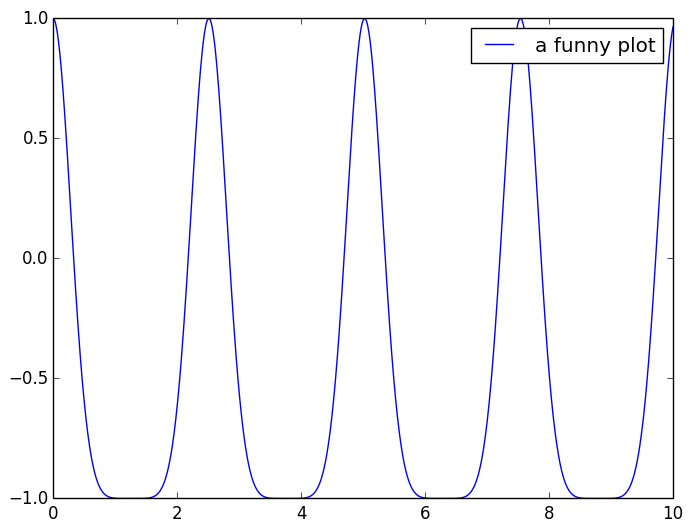

In [6]:
x = linspace(0,10,1000)
f = figure()
@manipulate for α = 1:0.1:4, β = 1:0.1:4, leg="a funny plot"
    withfig(f) do
        plot(x, cos(α*x + sin(β*x)))
        legend([leg])
    end
end

In [7]:
using SymPy
x = sym"x"
@manipulate for n=0:20
    latex(SymPy.diff(sin(x^2), x, n))
end

Slider{Int64}([Input{Int64}] 10,"n",10,0:20)

Figure(PyObject <matplotlib.figure.Figure object at 0x12408b590>)

Latex("","\$\$32 \\left(- 32 x^{10} \\sin{\\left (x^{2} \\right )} + 720 x^{8} \\cos{\\left (x^{2} \\right )} + 5040 x^{6} \\sin{\\left (x^{2} \\right )} - 12600 x^{4} \\cos{\\left (x^{2} \\right )} - 9450 x^{2} \\sin{\\left (x^{2} \\right )} + 945 \\cos{\\left (x^{2} \\right )}\\right)\$\$")